Multiple Linear Regression has more than one splitting line
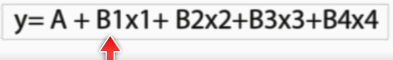

### 02 Exploring the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading the dataset
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1].values
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 03 Encoding Categorical Data

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#ColumnTranformer: 
#transformers: is alist of tupels
#encoder: name of the kind of transformer, makes setting of the transformers
#OneHotEncoder: provides an estimator for encoding, estimators always have to support fit and transform
#[3]: only the 4th columns will be transform
#remainder: tells what to do with the columns in the dataset, passthrough the other columns except the 4th one
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[3])], remainder="passthrough") 

#fit and transform the dataset
#now our dataset will only be numerical and is ready to be manipulated
X = np.array(ct.fit_transform(X))

In [4]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

### 04 Splitting Data into Train and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

#20% of the data ist the test set (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 05 Training the Model on the Training Set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 06 Predicting the Test Set Results

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
#predicting the values of our test data as y_pred
df = pd.DataFrame({"Real Values": y_test, "Predicted Values": y_pred})
df
#result: prediction close to the real values

,Real Values,Predicted Values
0,78239.91,74159.679531
1,42559.73,45806.604413
2,111313.02,115368.482190
3,64926.08,47033.736939
4,96479.51,90710.911192
5,152211.77,150572.415839
6,81005.76,84333.856078
7,134307.35,126887.838839
8,156122.51,158548.088904
9,35673.41,50823.714349


### 07 Evaluating the Performance of the Regression Model
- mean absolute error: value - predicted value and summed up, finally div by n => how accurate our model is
- mean squared error: same as before but as a square, finally div by n => how accurate our model is
- root mean squared error: same as before but as a root, finally div by n => how accurate our model is

### 08 Root Mean Squared Error in Python

In [10]:
#RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8374.2338542586
